In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import adapt
from utils import datasets

In [6]:
x_train, x_test, y_train, y_test, classes = datasets.load('covid')
domains = x_train.keys()
for source_domain in domains:
    dist = adapt.metrics.normalized_frechet_distance(x_train[source_domain], x_test[source_domain][:800])
    print(f'Normalized Frechet distance between {source_domain} train and {source_domain} test = {dist}')
    for target_domain in domains:
        if source_domain != target_domain:
            dist = adapt.metrics.normalized_frechet_distance(x_train[source_domain], x_train[target_domain])
            print(f'Normalized Frechet distance between {source_domain} and {target_domain} = {dist}')

Normalized Frechet distance between 1 train and 1 test = 0.00732570044959665
Normalized Frechet distance between 1 and 2 = 0.02827577757698969
Normalized Frechet distance between 1 and 3 = 0.038380433525709814
Normalized Frechet distance between 1 and 4 = 0.08584513176172537
Normalized Frechet distance between 1 and 5 = 0.06244547778659159
Normalized Frechet distance between 2 train and 2 test = 0.012655627656693787
Normalized Frechet distance between 2 and 1 = 0.028275777576991127
Normalized Frechet distance between 2 and 3 = 0.050384298618539686
Normalized Frechet distance between 2 and 4 = 0.09255483632854947
Normalized Frechet distance between 2 and 5 = 0.07323162218263998
Normalized Frechet distance between 3 train and 3 test = 0.0099991552064245
Normalized Frechet distance between 3 and 1 = 0.03838043352570987
Normalized Frechet distance between 3 and 2 = 0.05038429861853991
Normalized Frechet distance between 3 and 4 = 0.06776999679904121
Normalized Frechet distance between 3 an

In [40]:
x_train, x_test, y_train, y_test, classes = datasets.load('covid')
domains = x_train.keys()
ref = {}
for source_domain in domains:
    ref[source_domain] = adapt.metrics.normalized_frechet_distance(x_train[source_domain], x_test[source_domain][:800])
print('\hline')
print(f'& Domain {" & Domain ".join(domains)} & Avg \\\\')
print('\hline')
for source_domain in domains:
    line = f'Domain {source_domain}'
    dists = 0
    for target_domain in domains:
        if source_domain != target_domain:
            dist = adapt.metrics.normalized_frechet_distance(x_train[source_domain], x_train[target_domain])
            dist = dist / ((ref[source_domain] + ref[target_domain]) / 2)
            dists += dist
            line += f' & {dist:.04f}'
        else:
            line += ' & 1'
    print(line + f' & {dists / (len(domains) - 1):.04f} \\\\')
    print('\hline')

\hline
& Domain 1 & Domain 2 & Domain 3 & Domain 4 & Domain 5 & Avg \\
\hline
Domain 1 & 1 & 2.8302 & 4.4307 & 10.8135 & 7.5723 & 6.4117 \\
\hline
Domain 2 & 2.8302 & 1 & 4.4480 & 8.7286 & 6.7114 & 5.6796 \\
\hline
Domain 3 & 4.4307 & 4.4480 & 1 & 7.3064 & 16.4329 & 8.1545 \\
\hline
Domain 4 & 10.8135 & 8.7286 & 7.3064 & 1 & 21.5074 & 12.0890 \\
\hline
Domain 5 & 7.5723 & 6.7114 & 16.4329 & 21.5074 & 1 & 13.0560 \\
\hline


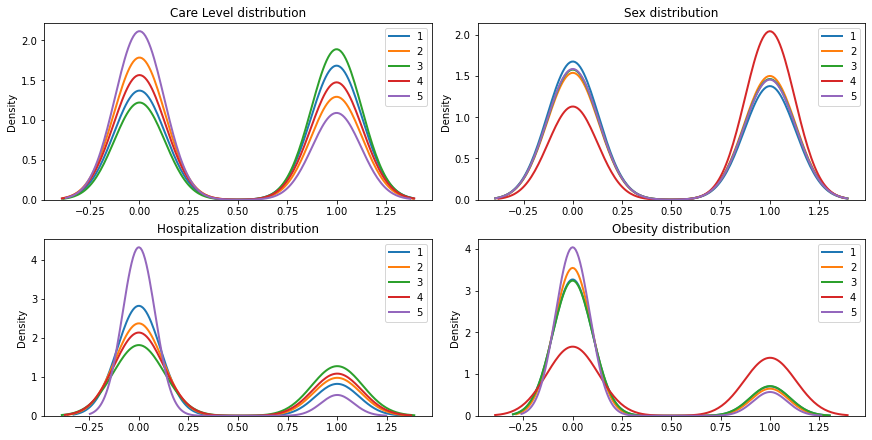

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

features = {
    0: 'Care Level',
    1: 'Sex',
    2: 'Hospitalization',
    13: 'Obesity',
}

fig, axes = plt.subplots(2, 2, figsize=(12, 6), layout='constrained')

a = 0
for i, feat in features.items():
    for domain in domains:
        if feat in ['Obesity', 'Care Level']:
            sns.kdeplot(~x_train[domain][:,i].astype(bool), label=domain, ax=axes.flat[a], linewidth=2)
        else:
            sns.kdeplot(x_train[domain][:,i], label=domain, ax=axes.flat[a], linewidth=2)
        axes.flat[a].set_title(f'{feat} distribution')
        axes.flat[a].legend()
    a += 1
plt.savefig('covid_distributions.svg')


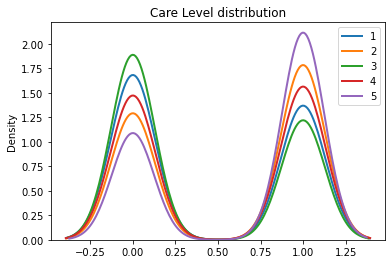

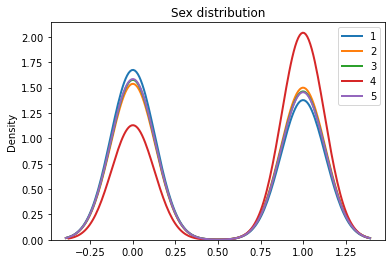

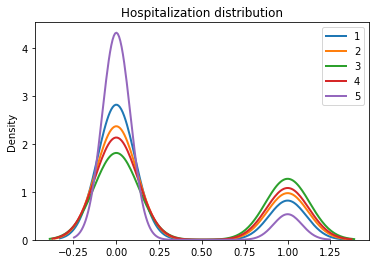

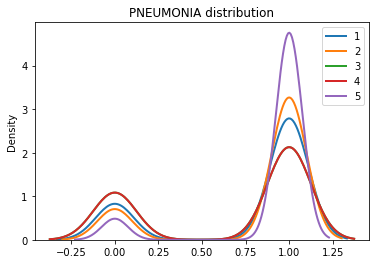

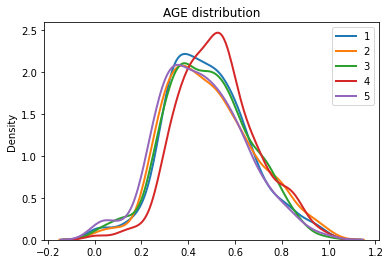

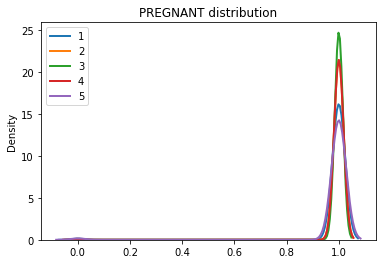

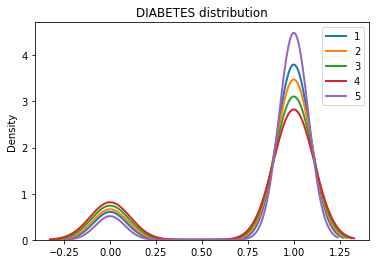

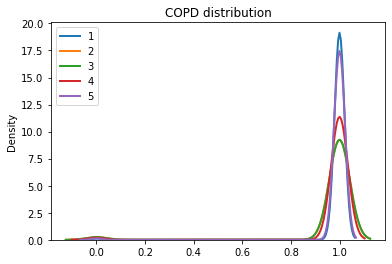

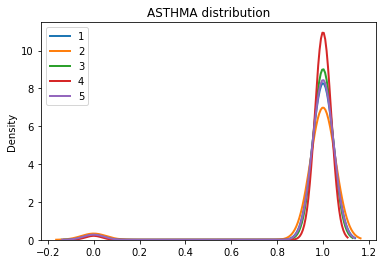

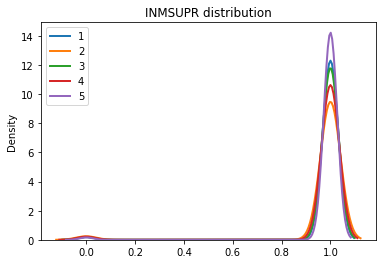

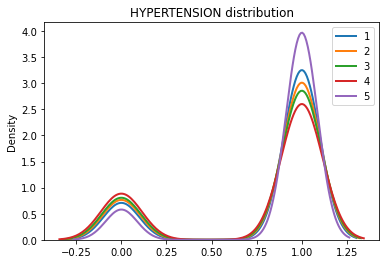

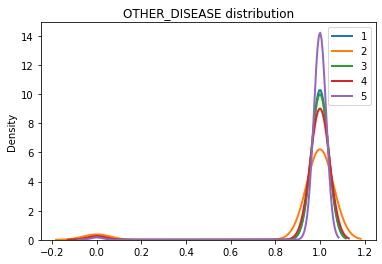

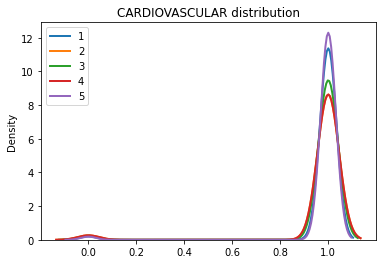

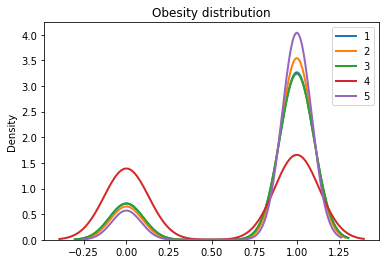

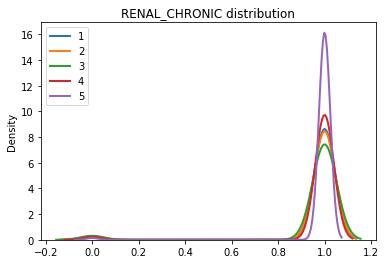

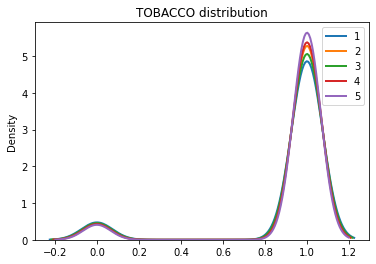

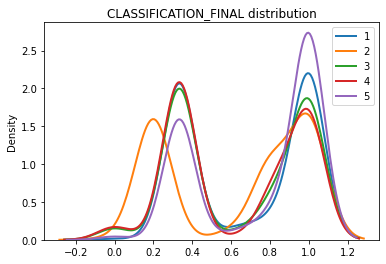

In [36]:
features = {
    0: 'Care Level',
    1: 'Sex',
    2: 'Hospitalization',
    3: 'PNEUMONIA',
    4: 'AGE',
    5: 'PREGNANT',
    6: 'DIABETES',
    7: 'COPD',
    8: 'ASTHMA',
    9: 'INMSUPR',
    10: 'HYPERTENSION',
    11: 'OTHER_DISEASE',
    12: 'CARDIOVASCULAR',
    13: 'Obesity',
    14: 'RENAL_CHRONIC',
    15: 'TOBACCO',
    16: 'CLASSIFICATION_FINAL'
}

for i, feat in features.items():
    for domain in domains:
        sns.kdeplot(x_train[domain][:,i], label=domain, linewidth=2)
    plt.title(f'{feat} distribution')
    plt.legend()
    plt.show()